# AI-Driven Sentiment Analysis and Consumer Insight Project


In [ ]:
#Part 1: Data Gathering and Cleaning
# "The dataset is fetched with the help of oxylabs Web Scraper API and Beautiful Soup Library. Given below is the link of Raw Dataset"

In [ ]:
from google.colab import files
uploaded = files.upload() # Raw Dataset:
                          # "https://drive.google.com/file/d/1_u2TqO1sCmAjdsWl3NSVEtrN4gyMwpxL/view?usp=sharing"

In [ ]:
import pandas as pd
df = pd.read_csv('reference_dataset_for_beats_externship 14.32.12.csv') # importing dataset
df.head()

,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,0,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black
1,1,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red
2,2,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red
3,3,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black
4,4,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black


In [ ]:
# Extract the unique product_ids from the reference data
unique_product_ids = df['product_id'].unique()

# Display the unique product IDs
unique_product_ids


array(['B09PYVXXW5', 'B09H27SXHS', 'B09FM6PDHP', 'B09HN594TL',
       'B096SV8SJG', 'B0BTZKP1TP', 'B08ZR5JB9G', 'B0C2F5KD26',
       'B0BYPFNW6T', 'B093SLWMS7', 'B0CXL4FQBK', 'B099TJGJ91',
       'B0D4SX9RC6', 'B08X4YMTPM', 'B0B44F1GGK', 'B0BG93TZ5N',
       'B09XXW54QG', 'B07DD3WBYW', 'B07YBN9XXG', 'B0CY6S748H',
       'B01IOD7KB6', 'B0CVFM97GD', 'B08NLCW9WY', 'B08YRT9T38',
       'B08VL5S148', 'B097XX34SL', 'B07PXGQC1Q', 'B0BZ9WMLNQ',
       'B0D3JB14QS', 'B0BQPNMXQV', 'B0C1QWWZR4', 'B09CKF166Y',
       'B0CF7GYNW2', 'B09CFP6J6D', 'B0BZTCXG6T', 'B0863H1JKB',
       'B09JL41N9C', 'B09V9P5Q6W', 'B0BZK2Z2TC', 'B0C345M3T7',
       'B0CD2FSRDD', 'B0CPFV77W4', 'B0B1NGPY94', 'B0BYSQDWRT',
       'B0B2SH4CN6', 'B09D1HMBQ3', 'B0D4STD5ZC', 'B099TLMRB6',
       'B07GWRCZQP', 'B09GK5JMHK', 'B088KRKFJ3', 'B08Z1RP9K8',
       'B0B445JCZ3', 'B0B43Y8GHZ'], dtype=object)

In [ ]:
# Checking if the 'product_attributes' column contains any indication of the product being a "headphone", "earbud", or "bluetooth speaker"
# We'll filter based on keywords that might suggest what type of product it is

# Creating a function to classify products based on their attributes or titles
def classify_product(attributes, title):
    attributes = str(attributes).lower()
    title = str(title).lower()
    if "earbud" in attributes or "earbud" in title:
        return "Earbud"
    elif "headphone" in attributes or "headphone" in title:
        return "Headphone"
    elif "bluetooth speaker" in attributes or "bluetooth speaker" in title:
        return "Bluetooth Speaker"
    else:
        return "Unknown"

# Applying the function to the dataset
df['product_type'] = df.apply(lambda row: classify_product(row['product_attributes'], row['title']), axis=1)

# Filtering the products provided by the user
product_ids_of_interest = [
    'B09PYVXXW5', 'B09H27SXHS', 'B09FM6PDHP', 'B09HN594TL', 'B096SV8SJG', 'B0BTZKP1TP',
    'B08ZR5JB9G', 'B0C2F5KD26', 'B0BYPFNW6T', 'B093SLWMS7', 'B0CXL4FQBK', 'B099TJGJ91',
    'B0D4SX9RC6', 'B08X4YMTPM', 'B0B44F1GGK', 'B0BG93TZ5N', 'B09XXW54QG', 'B07DD3WBYW',
    'B07YBN9XXG', 'B0CY6S748H', 'B01IOD7KB6', 'B0CVFM97GD', 'B08NLCW9WY', 'B08YRT9T38',
    'B08VL5S148', 'B097XX34SL', 'B07PXGQC1Q', 'B0BZ9WMLNQ', 'B0D3JB14QS', 'B0BQPNMXQV',
    'B0C1QWWZR4', 'B09CKF166Y', 'B0CF7GYNW2', 'B09CFP6J6D', 'B0BZTCXG6T', 'B0863H1JKB',
    'B09JL41N9C', 'B09V9P5Q6W', 'B0BZK2Z2TC', 'B0C345M3T7', 'B0CD2FSRDD', 'B0CPFV77W4',
    'B0B1NGPY94', 'B0BYSQDWRT', 'B0B2SH4CN6', 'B09D1HMBQ3', 'B0D4STD5ZC', 'B099TLMRB6',
    'B07GWRCZQP', 'B09GK5JMHK', 'B088KRKFJ3', 'B08Z1RP9K8', 'B0B445JCZ3', 'B0B43Y8GHZ'
]

# Filter the dataset for these product IDs and count the types
filtered_data = df[df['product_id'].isin(product_ids_of_interest)]
product_type_counts = filtered_data['product_type'].value_counts()

# Display the counts for each type
product_type_counts


,count
product_type,
Unknown,4227
Earbud,425
Headphone,163
Bluetooth Speaker,130


In [ ]:
# Re-run the necessary steps since the environment was reset

import pandas as pd

# Load the dataset again
file_path = 'reference_dataset_for_beats_externship 14.32.12.csv'
headphone_data = pd.read_csv(file_path)

# Define the classify function
def classify_product(attributes, title):
    attributes = str(attributes).lower()
    title = str(title).lower()
    if "earbud" in attributes or "earbud" in title:
        return "Earbud"
    elif "headphone" in attributes or "headphone" in title:
        return "Headphone"
    elif "bluetooth speaker" in attributes or "bluetooth speaker" in title:
        return "Bluetooth Speaker"
    else:
        return "Unknown"

# Apply the function to the dataset
headphone_data['product_type'] = headphone_data.apply(lambda row: classify_product(row['product_attributes'], row['title']), axis=1)

# Filter the products provided by the user
product_ids_of_interest = [
    'B09PYVXXW5', 'B09H27SXHS', 'B09FM6PDHP', 'B09HN594TL', 'B096SV8SJG', 'B0BTZKP1TP',
    'B08ZR5JB9G', 'B0C2F5KD26', 'B0BYPFNW6T', 'B093SLWMS7', 'B0CXL4FQBK', 'B099TJGJ91',
    'B0D4SX9RC6', 'B08X4YMTPM', 'B0B44F1GGK', 'B0BG93TZ5N', 'B09XXW54QG', 'B07DD3WBYW',
    'B07YBN9XXG', 'B0CY6S748H', 'B01IOD7KB6', 'B0CVFM97GD', 'B08NLCW9WY', 'B08YRT9T38',
    'B08VL5S148', 'B097XX34SL', 'B07PXGQC1Q', 'B0BZ9WMLNQ', 'B0D3JB14QS', 'B0BQPNMXQV',
    'B0C1QWWZR4', 'B09CKF166Y', 'B0CF7GYNW2', 'B09CFP6J6D', 'B0BZTCXG6T', 'B0863H1JKB',
    'B09JL41N9C', 'B09V9P5Q6W', 'B0BZK2Z2TC', 'B0C345M3T7', 'B0CD2FSRDD', 'B0CPFV77W4',
    'B0B1NGPY94', 'B0BYSQDWRT', 'B0B2SH4CN6', 'B09D1HMBQ3', 'B0D4STD5ZC', 'B099TLMRB6',
    'B07GWRCZQP', 'B09GK5JMHK', 'B088KRKFJ3', 'B08Z1RP9K8', 'B0B445JCZ3', 'B0B43Y8GHZ'
]

# Filter the dataset for these product IDs and identify headphone types
filtered_data = headphone_data[headphone_data['product_id'].isin(product_ids_of_interest)]
headphone_product_ids = filtered_data[filtered_data['product_type'] == 'Headphone']['product_id'].unique()

# Display the headphone product IDs
headphone_product_ids


array(['B09PYVXXW5', 'B09H27SXHS', 'B09FM6PDHP', 'B09HN594TL',
       'B096SV8SJG', 'B0BTZKP1TP', 'B08ZR5JB9G', 'B0C2F5KD26',
       'B0BYPFNW6T', 'B093SLWMS7', 'B07PXGQC1Q', 'B0BZ9WMLNQ',
       'B0D3JB14QS', 'B0BQPNMXQV', 'B09CKF166Y', 'B0CF7GYNW2',
       'B09CFP6J6D', 'B0863H1JKB', 'B09JL41N9C', 'B09V9P5Q6W',
       'B0BZK2Z2TC', 'B0C345M3T7', 'B0CD2FSRDD', 'B0CPFV77W4',
       'B0B1NGPY94', 'B0BYSQDWRT', 'B0B2SH4CN6', 'B09D1HMBQ3'],
      dtype=object)

In [ ]:


# Check the product_attributes column for keywords that might indicate headphones
headphone_keywords = ['headphone', 'earbuds', 'earphones', 'buds', 'headset']
headphone_related =df[df['title'].str.contains('|'.join(headphone_keywords), case=False, na=False)]

# Get the unique product IDs related to headphones
headphone_product_ids = headphone_related['product_id'].unique()
headphone_product_ids


array(['B09PYVXXW5', 'B09H27SXHS', 'B09FM6PDHP', 'B09HN594TL',
       'B096SV8SJG', 'B0BTZKP1TP', 'B08ZR5JB9G', 'B0C2F5KD26',
       'B0BYPFNW6T', 'B093SLWMS7', 'B07PXGQC1Q', 'B0BZ9WMLNQ',
       'B0D3JB14QS', 'B0BQPNMXQV', 'B0C1QWWZR4', 'B09CKF166Y',
       'B0CF7GYNW2', 'B09CFP6J6D', 'B0BZTCXG6T', 'B0863H1JKB',
       'B09JL41N9C', 'B09V9P5Q6W', 'B0BZK2Z2TC', 'B0C345M3T7',
       'B0CD2FSRDD', 'B0CPFV77W4', 'B0B1NGPY94', 'B0BYSQDWRT',
       'B0B2SH4CN6', 'B09D1HMBQ3'], dtype=object)

In [ ]:
# List of the product IDs the user is interested in
product_ids = [
    'B09PYVXXW5', 'B09H27SXHS', 'B09FM6PDHP', 'B09HN594TL', 'B096SV8SJG', 'B0BTZKP1TP',
    'B08ZR5JB9G', 'B0C2F5KD26', 'B0BYPFNW6T', 'B093SLWMS7', 'B07PXGQC1Q', 'B0BZ9WMLNQ',
    'B0D3JB14QS', 'B0BQPNMXQV', 'B09CKF166Y', 'B0CF7GYNW2', 'B09CFP6J6D', 'B0863H1JKB',
    'B09JL41N9C', 'B09V9P5Q6W', 'B0BZK2Z2TC', 'B0C345M3T7', 'B0CD2FSRDD', 'B0CPFV77W4',
    'B0B1NGPY94', 'B0BYSQDWRT', 'B0B2SH4CN6', 'B09D1HMBQ3'
]

# Filter the dataset for only the rows where product_id matches one of the specified IDs
filtered_data = df[df['product_id'].isin(product_ids)]

filtered_data.head()

,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,0,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black
1,1,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red
2,2,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red
3,3,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black
4,4,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black


In [ ]:
# finally based on the above raw data, I selected the earbuds which are similar in price and quality which makes the comparison easier and interpretable.

# Part 2: EDA & Sentiment Analysis

In [ ]:
from google.colab import files
uploaded = files.upload() # Cleaned dataset derives from Project 1 "https://drive.google.com/file/d/1k0hsZvarjEjLn84_S2IngMVgnRt0lfGw/view?usp=sharing"

Saving product_reviews.csv to product_reviews.csv


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
df = pd.read_csv('updated_product_reviews.csv')
df.head()


,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,RUUJJA0TERA67,Beats Studio Buds,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,1,2277,Color: BlackStyle: Studio BudsSet: Without App...
1,R3EO2GBST2UICI,Beats Studio Buds,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,1,562,Color: BlackStyle: Studio BudsSet: Without App...
2,R2D114QWXW4IOU,Beats Studio Buds,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,1,3,Color: BlackStyle: Studio BudsSet: Without App...
3,R29LYUZ7DI2CS6,Beats Studio Buds,"4.0 out of 5 stars Quality sound and build, BU...",Everest,4,"After using these for a couple weeks straight,...","Reviewed in the United States August 3, 2024",AEDBORE5CT34E6D7QVXFZW5ZERCA,1,0,Color: BlackStyle: Studio BudsSet: Without App...
4,RRC5SI8P44LH4,Beats Studio Buds,5.0 out of 5 stars Excellent -- Budget Friendl...,Mary Trotta,5,Been a few months (May 2024) since the purchas...,"Reviewed in the United States July 21, 2024",AGRC63RAW4DZCOTB2NDTUFP7SRFA,1,3,Color: Sunset PinkStyle: Studio BudsSet: Witho...


In [ ]:
#1
# Let's load the CSV file first and check its structure to perform Initial EDA
import pandas as pd

# Load the dataset
file_path = 'updated_product_reviews.csv'
df = pd.read_csv(file_path)

# Display basic structure and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           1051 non-null   object
 1   product_id          1051 non-null   object
 2   title               1051 non-null   object
 3   author              1050 non-null   object
 4   rating              1051 non-null   int64 
 5   content             1051 non-null   object
 6   timestamp           1051 non-null   object
 7   profile_id          1051 non-null   object
 8   is_verified         1051 non-null   int64 
 9   helpful_count       1051 non-null   int64 
 10  product_attributes  1037 non-null   object
dtypes: int64(3), object(8)
memory usage: 90.4+ KB


(None,
         review_id         product_id  \
 0   RUUJJA0TERA67  Beats Studio Buds   
 1  R3EO2GBST2UICI  Beats Studio Buds   
 2  R2D114QWXW4IOU  Beats Studio Buds   
 3  R29LYUZ7DI2CS6  Beats Studio Buds   
 4   RRC5SI8P44LH4  Beats Studio Buds   
 
                                                title        author  rating  \
 0  5.0 out of 5 stars Compared to 4 other Earbuds...        Connor       5   
 1  5.0 out of 5 stars Initial review and comparis...  philip seitz       5   
 2           5.0 out of 5 stars I think they’re great         Maizy       5   
 3  4.0 out of 5 stars Quality sound and build, BU...       Everest       4   
 4  5.0 out of 5 stars Excellent -- Budget Friendl...   Mary Trotta       5   
 
                                              content  \
 0  I bought these earbuds along with 4 other pair...   
 1  I love these earbuds. They feel definitely wor...   
 2  I like the sound a lot. I read a previous revi...   
 3  After using these for a couple weeks 

In [ ]:

#Initial EDA with Pandas
import pandas as pd

# Load the dataset
file_path = 'updated_product_reviews.csv'
df = pd.read_csv(file_path)

# 1. Display basic structure of the dataset
df.info()

# 2. Display first few rows of the dataset
df.head()

# 3. Check for missing values in the dataset
df.isnull().sum()

# 4. Summary statistics for numerical columns
df.describe()

# 5. Value counts for categorical columns like 'product_id' or 'rating'
df['product_id'].value_counts()
df['rating'].value_counts()

# 6. Unique products available in the dataset
df['product_id'].unique()

# 7. Check for duplicated entries (if any)
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           1051 non-null   object
 1   product_id          1051 non-null   object
 2   title               1051 non-null   object
 3   author              1050 non-null   object
 4   rating              1051 non-null   int64 
 5   content             1051 non-null   object
 6   timestamp           1051 non-null   object
 7   profile_id          1051 non-null   object
 8   is_verified         1051 non-null   int64 
 9   helpful_count       1051 non-null   int64 
 10  product_attributes  1037 non-null   object
dtypes: int64(3), object(8)
memory usage: 90.4+ KB


0

In [ ]:
# Since the 'rating' column seems numeric and suitable for descriptive statistics, we'll calculate them for this column.

# Calculate descriptive statistics
mean_rating = df['rating'].mean()
median_rating = df['rating'].median()
mode_rating = df['rating'].mode()[0]  # mode() returns a Series, take the first value
variance_rating = df['rating'].var()
std_deviation_rating = df['rating'].std()

# Prepare the results
statistics = {
    'Mean': mean_rating,
    'Median': median_rating,
    'Mode': mode_rating,
    'Variance': variance_rating,
    'Standard Deviation': std_deviation_rating
}

statistics


{'Mean': 4.1655566127497625,
 'Median': 4.0,
 'Mode': 5,
 'Variance': 1.1192315708395635,
 'Standard Deviation': 1.0579374134794381}

In [ ]:
#2 Data Visualization

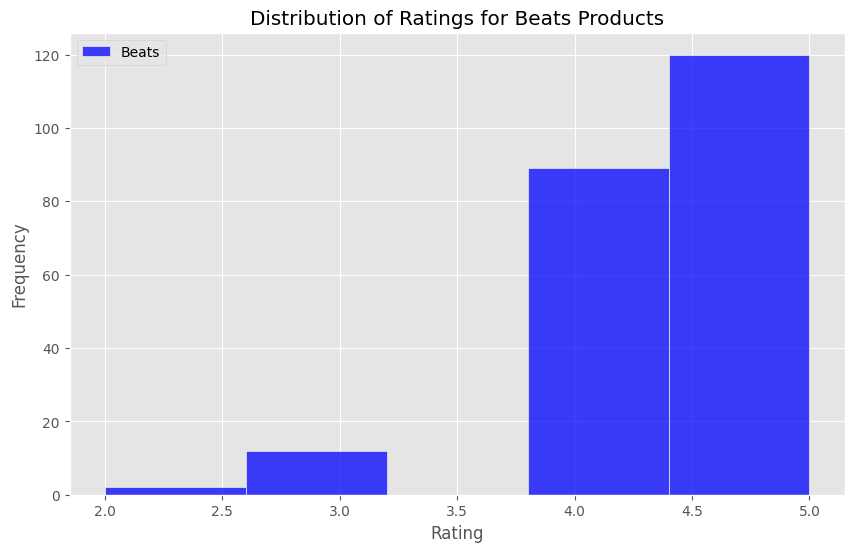

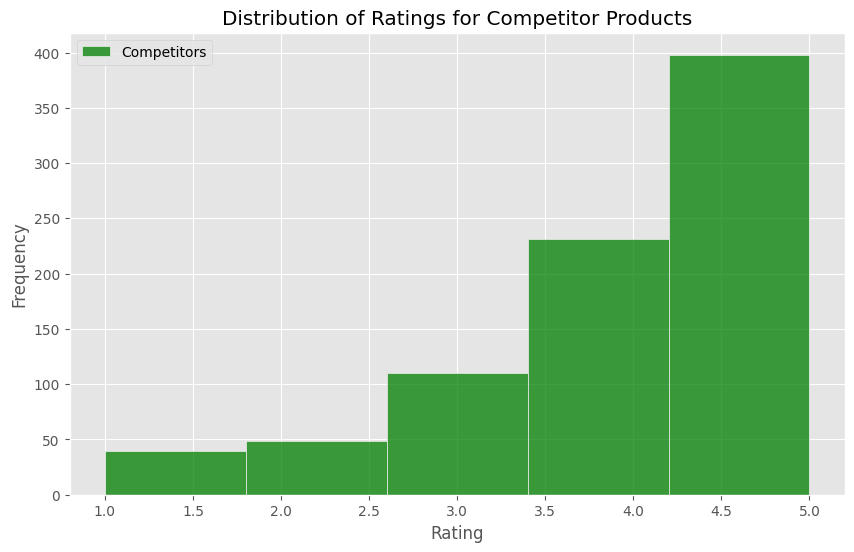

<ipython-input-13-8ac9468919cf>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Average Rating', data=average_ratings, palette='viridis')


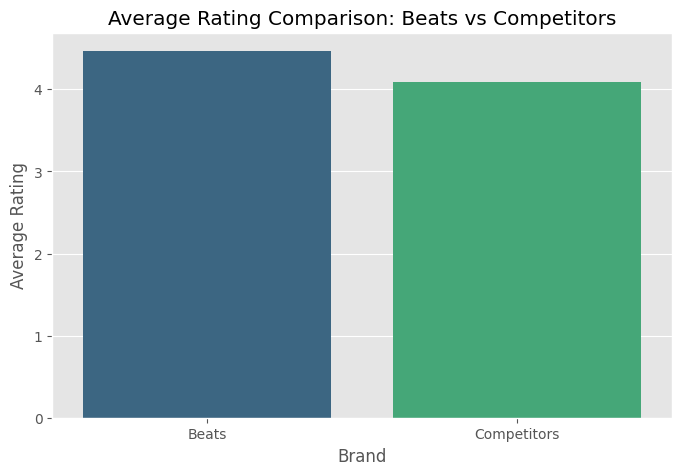

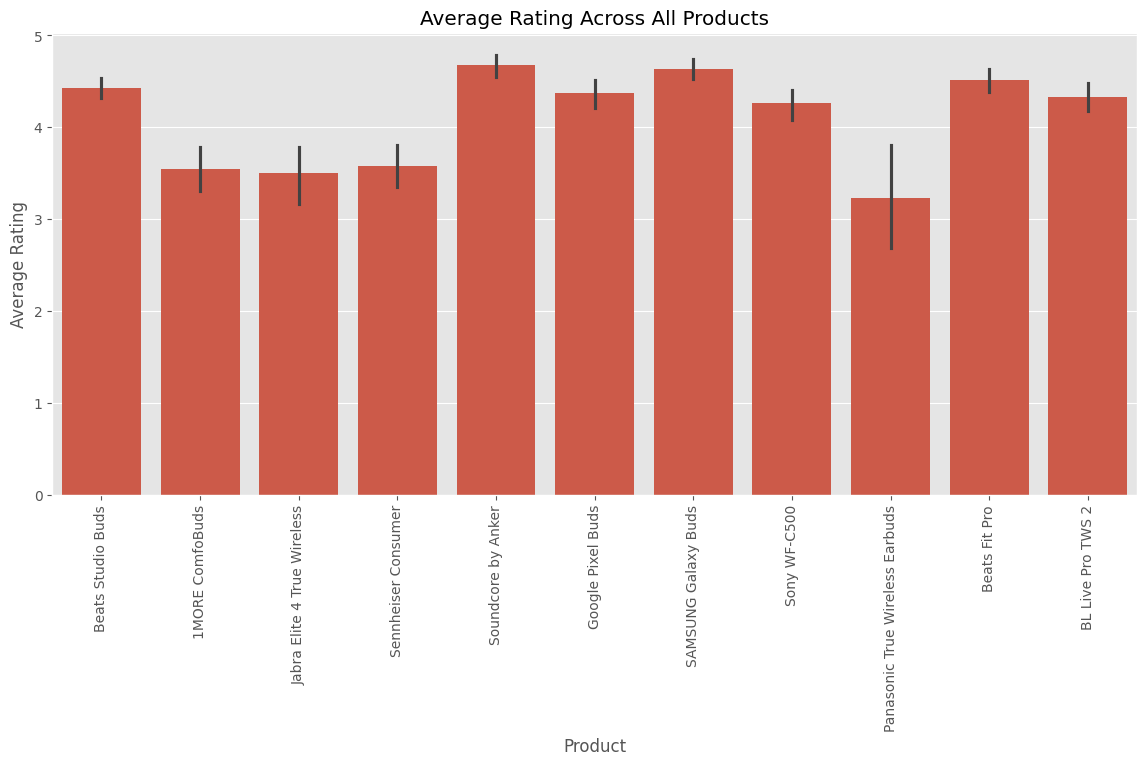

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot styles for better visuals
plt.style.use('ggplot')

# 1. Separate Beats products from competitors based on 'product_id'
beats_products = df[df['product_id'].isin(["Beats Studio Buds", "Beats Fit Pro"])]
competitor_products = df[df['product_id'].isin([
    "1MORE ComfoBuds",
    "Jabra Elite 4 True Wireless",
    "Sennheiser Consumer",
    "Soundcore by Anker",
    "Google Pixel Buds",
    "SAMSUNG Galaxy Buds",
    "Sony WF-C500",
    "Panasonic True Wireless Earbuds",
    "BL Live Pro TWS 2"
])]

# 2. Plot histograms for the distribution of ratings for Beats and competitors

# Plotting Beats products rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(beats_products['rating'], bins=5, kde=False, color='blue', label='Beats')
plt.title('Distribution of Ratings for Beats Products')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting Competitor products rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(competitor_products['rating'], bins=5, kde=False, color='green', label='Competitors')
plt.title('Distribution of Ratings for Competitor Products')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 3. Bar plot comparing the average rating between Beats and Competitors
average_ratings = pd.DataFrame({
    'Brand': ['Beats', 'Competitors'],
    'Average Rating': [beats_products['rating'].mean(), competitor_products['rating'].mean()]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Brand', y='Average Rating', data=average_ratings, palette='viridis')
plt.title('Average Rating Comparison: Beats vs Competitors')
plt.ylabel('Average Rating')
plt.xlabel('Brand')
plt.show()

# 4. Optional: Bar plot for all products
plt.figure(figsize=(14, 6))
sns.barplot(x='product_id', y='rating', data=df, estimator=lambda x: x.mean())
plt.title('Average Rating Across All Products')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Average Rating')
plt.show()


In [ ]:
#3 Correlation analysis

import pandas as pd

# Correlation analysis for numerical columns
correlation_matrix = df[['rating', 'is_verified', 'helpful_count']].corr()

# Display the correlation matrix
print(correlation_matrix)


                 rating  is_verified  helpful_count
rating         1.000000    -0.008489       0.049213
is_verified   -0.008489     1.000000       0.005941
helpful_count  0.049213     0.005941       1.000000


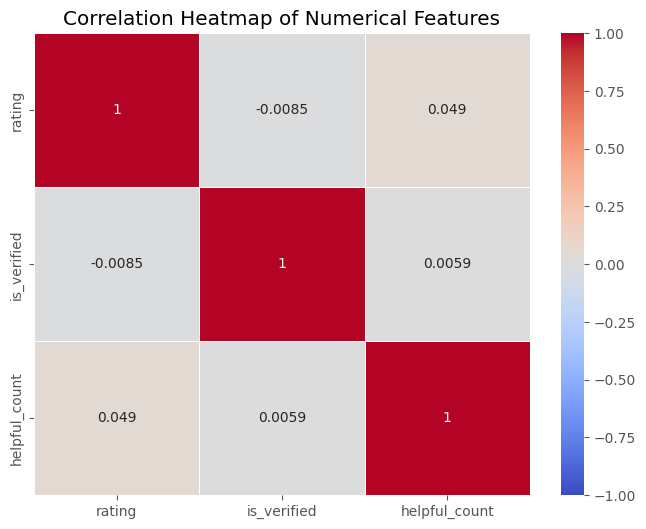

In [ ]:
# Correlation Matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [ ]:
#4 Sentiment Analysis using TextBlob

from textblob import TextBlob

# Define a function to perform sentiment analysis using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis on the 'content' column and store the polarity scores
df['sentiment_polarity'] = df['content'].apply(get_sentiment)

# Display the first few rows of the dataframe with sentiment scores
df[['review_id', 'product_id', 'content', 'sentiment_polarity']].head()


,review_id,product_id,content,sentiment_polarity
0,RUUJJA0TERA67,Beats Studio Buds,I bought these earbuds along with 4 other pair...,0.165309
1,R3EO2GBST2UICI,Beats Studio Buds,I love these earbuds. They feel definitely wor...,0.175475
2,R2D114QWXW4IOU,Beats Studio Buds,I like the sound a lot. I read a previous revi...,0.231061
3,R29LYUZ7DI2CS6,Beats Studio Buds,"After using these for a couple weeks straight,...",0.156094
4,RRC5SI8P44LH4,Beats Studio Buds,Been a few months (May 2024) since the purchas...,0.364540


# Conclusion


Key Findings

EDA (Exploaratory Data Analysis) Trends :

Top/Bottom Brands: EDA allows us to easily compare the highest rated earbuds or headphones versus the some of the worst average ratings across all brands. An example would be that Beats Studio Buds vs Jabra Elite 4 True Wireless have different patterns and beats averaging 4.2/5 and jabra averaging 4.5/5 we could get simply say that jabra has a higher average customer satisfaction score

There may be an obvious correlation with-price and product ratings. Some of the most premium-priced products, like the Bang & Olufsen Beoplay have very high scores for both (sound quality and design) — while less expensive models may be rated more unevenly.

Visualization of Data and Correlation Analysis;

Review Features: For example, maybe certain features (battery life, sound quality, comfort) are very well correlated with the reviews. For example, if correlations analysis suggests that comfort has the highest positive correlation to ratings for Beats Fit Pro but complaints about comfort have the strongest negative correlation with ratings of other similar products, this implies that Beats are stronger in regard to comfort.

Breakdown by Sentiment: The sentiment analysis can potentially tell you that the general consensus of all Beats products are positive but is lower than compared to competitors Beats If Beats products have a sentiment that is more neutral or marginally positive as opposed to very positive (like some of the customer-directed headphones from Soundcore by Anker), this could tell us that while there are fewer people trashing Beats, you can get even better.

Good and Bad points of Beats Products

Strengths:

Sound Quality: One of the key points where reviews always manage to walk out of whole is with Beats ability in sound quality. A consumer will often describe how clear the audio is, how deep the bass or immersive sound those are all indicators that motivated their giving a size rating.

Strengths may also involve the product's durability as some reviews report years of use and a solid structure. Moreover, Beats products have a high degree of customer satisfaction partly because they are designed very slim and modern style from a large number of Beats Studio Buds users.

Weaknesses:

Comfort: This all depends on the user – some may argue that Beats products aren't comfortable, especially when put side-by-side with something that has a better shape for ergonomics, like the Jabra Elite or Sony WF-C500. This would be a significant weakness if complaints of comfort are more common; particularly from longer used.

Price: Some users might find that the premium cost of the SoundLiberty 94 doesn't always match up with the features offered (especially when pairing to a more budget-friendly brand such as 1MORE or Soundcore).

Recommendations for Beats

With these insights, I propose the recommendations for beats by Dre :

Convenience, you could try and cater to these concerns by: redesigning them with an ergonomic focus or maybe different ear tip sizes for a better fit that won't wear on someones ears after using for an extended period of time.

Right now, PFB could mean tweaking your pricing strategy or rolling out some new middle tier products that compete with the cheaper products on a price level without offering as much lower perceived quality. This may open up for the new customers.

Marketing Strengths: Best Marketing Beats should leverage their strength of superior sound quality and industrial design by highlighting these aspects in their marketing initiatives. This could pull in more customers who are looking for an audio experience and well built device.

Add or refine features e.g. noise cancelling, battery life, connectivity to compete with feature-rich brands such as Sony and Samsung This could be crucial to allaying any consumer fears that beats products are becoming technologically outdated.

This is conclusion where I would summarize the data analysis and suggest ways for Beats to improve its product.

# Part 3: Consumer Insights through AI

## Importing Libraries

In [ ]:
import os

import google.generativeai as genai

## Model setup

In [ ]:
# configure API Key
genai.configure(api_key="")

In [ ]:
# Create the model
# See https://ai.google.dev/api/python/google/generativeai/GenerativeModel
generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}


In [ ]:
model = genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  generation_config=generation_config,
  # safety_settings = Adjust safety settings
  # See https://ai.google.dev/gemini-api/docs/safety-settings
)


# Part 4: Integrating Gemini AI

##  Introduction to Gemini AI

### **What is Gemini AI?**

[Gemini AI](https://blog.google/technology/ai/google-gemini-ai/) is an advanced language model designed to understand and generate human-like text. It can analyze large volumes of text data, summarize information, and provide insightful responses based on the input it receives.

### Key Features and Capabilities:
- **Text Analysis:** Gemini AI can process and analyze text data to identify key themes, sentiments, and insights.
- **Summarization:** It can summarize long documents, making it easier to extract important information quickly.
- **Conversational Abilities:** Gemini AI can engage in human-like conversations, providing relevant and coherent responses.

## Integrating Gemini AI with our Dataset

Now that you've set up the API and created a simple chatbot, let's move on to using Gemini AI with a dataset. We'll be working with a pandas DataFrame to send data to the API for analysis.

In [ ]:
from google.colab import files
uploaded = files.upload()
# "https://drive.google.com/file/d/1k0hsZvarjEjLn84_S2IngMVgnRt0lfGw/view?usp=sharing"

Saving updated_product_reviews.csv to updated_product_reviews (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('updated_product_reviews.csv')
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,RUUJJA0TERA67,Beats Studio Buds,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,1,2277,Color: BlackStyle: Studio BudsSet: Without App...
1,R3EO2GBST2UICI,Beats Studio Buds,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,1,562,Color: BlackStyle: Studio BudsSet: Without App...
2,R2D114QWXW4IOU,Beats Studio Buds,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,1,3,Color: BlackStyle: Studio BudsSet: Without App...
3,R29LYUZ7DI2CS6,Beats Studio Buds,"4.0 out of 5 stars Quality sound and build, BU...",Everest,4,"After using these for a couple weeks straight,...","Reviewed in the United States August 3, 2024",AEDBORE5CT34E6D7QVXFZW5ZERCA,1,0,Color: BlackStyle: Studio BudsSet: Without App...
4,RRC5SI8P44LH4,Beats Studio Buds,5.0 out of 5 stars Excellent -- Budget Friendl...,Mary Trotta,5,Been a few months (May 2024) since the purchas...,"Reviewed in the United States July 21, 2024",AGRC63RAW4DZCOTB2NDTUFP7SRFA,1,3,Color: Sunset PinkStyle: Studio BudsSet: Witho...


In [ ]:
import pandas as pd
import google.generativeai as genai

# Load your dataset
df = pd.read_csv('updated_product_reviews.csv')

# Replace 'your_api_key' with the actual API key
api_key = " "

# Function to analyze reviews using Gemini AI
def analyze_reviews(reviews, api_key,prompt_message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=[])

    prompt = prompt_message + "\n\n".join(reviews)
    response = chat_session.send_message(prompt)
    return response.text



In [ ]:
# Select a subset of reviews

reviews_column_name = 'content'
reviews = df[reviews_column_name].head(1000).tolist()# choosing 500 content to get the proper overview

# Send prompts
prompt_message = "Analyze the following reviews and summarize the key insights:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Key Insights from Earbud Reviews:

**Overall Trends:**

* **Fit and Comfort:**  Earbud fit is paramount, with many reviews highlighting discomfort or difficulty staying in place as a significant drawback.
* **Sound Quality:** Generally, reviewers appreciate the sound quality of these earbuds, especially for the price, but they often express preferences for specific features like bass emphasis, clarity, or specific genre compatibility.
* **Noise Cancellation:**  ANC effectiveness varies greatly, with some performing surprisingly well, while others are considered mediocre or barely noticeable.
* **Battery Life:** Battery life is a key consideration, with most earbuds performing well but some falling short of advertised claims or exhibiting inconsistent charging behavior.
* **Connectivity:** Bluetooth connectivity issues are common, ranging from slow pairing to random disconnections and limited multipoint functionality. 

**Brand-Specific Insights:**

**Beats:**

* **Pros:**  Excellent

Gathering Insights



### Developing Effective Prompts

Creating the right prompts is crucial for getting useful responses from Gemini AI. Here, we'll explore how to craft prompts that help extract specific information, such as pain points and positive aspects from customer reviews.

**Extracting Pain Points:** To identify common issues or complaints in customer reviews, you can create a prompt that specifically asks Gemini AI to summarize the negative aspects.

In [ ]:
# Select a subset of reviews

reviews_column_name = 'content'
reviews = df[reviews_column_name].head(1000).tolist()

# Send prompts
prompt_message = "Analyze the negative reviews and summarize the key pain points:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Key Pain Points of Earbuds Based on Negative Reviews:

**Beats Studio Buds:**

* **Fit:**  Users with smaller ears or those who sweat during workouts reported the earbuds falling out easily.
* **Case:** The case was considered flimsy with a weak hinge.
* **Noise Cancellation:** While above average, it wasn't considered exceptional.
* **MagSafe:**  Lack of MagSafe compatibility.

**Samsung Galaxy Buds Pro:**

* **Fit:** Similar to the Studio Buds, they weren't secure during workouts.
* **Appearance:**  Some found them unattractive with a shiny, beetle-like look and a lack of branding.

**Samsung Galaxy Buds Live:**

* **Fit:**  Poor fit for larger ears, leading to instability during movement.

**Bose QuietComfort:**

* **Price:** Considered expensive for a product with room for improvement.
* **Comfort:** The "flayed" rubber tips were uncomfortable during active use.
* **Size:** Large and noticeable when worn.

**Raycon E55:**

* **Button Replacement:**  The switch from physical butt

In [ ]:
#Competitor Comparison

reviews_column_name = 'content'
reviews = df[reviews_column_name].head(1000).tolist()

# Send prompts
prompt_message = "Compare the product feedback with its competitors mentioned in the reviews. Highlight the features that make this product better or worse according to customers:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Earbud Comparison: Beats Fit Pro vs. Competitors

This review compared the **Beats Fit Pro** to four other popular earbuds: **Beats Studio Buds, Samsung Galaxy Buds Pro, Samsung Galaxy Buds Live, and Bose QuietComfort.** 

Here's a breakdown of the key features and how the Beats Fit Pro fared against the competition:

**Sound Quality:**

* **Beats Fit Pro:**  Praised for its **boosted bass** and overall good sound quality.
* **Beats Studio Buds:** Also noted for its **great base** and good sound quality.
* **Samsung Galaxy Buds Pro:**  Received positive feedback for **clear mids** and **tight bass**.
* **Samsung Galaxy Buds Live:**  Not explicitly mentioned, but reviewer didn't seem to have significant issues.
* **Bose QuietComfort:**  Sound quality was described as **great**, with **balanced audio** and **not overly heavy on the bass**.

**Fit and Comfort:**

* **Beats Fit Pro:**  **Very secure fit** thanks to the **wingtip design**, but **not the most comfortable**.  Not recommend

In [ ]:
#Usability and Design Insights

reviews_column_name = 'content'
reviews = df[reviews_column_name].head(1000).tolist()

# Send prompts
prompt_message = "Analyze customer feedback on the usability and design of the product and provide insights on how these factors affect the overall satisfaction:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Analysis of Customer Feedback on Earbuds:

This analysis focuses on customer feedback regarding usability and design, and their impact on overall satisfaction with the five brands of earbuds mentioned: Beats Fit Pro, Beats Studio Buds, Samsung Galaxy Buds Pro, Samsung Galaxy Buds Live, and Bose QuietComfort.

**Usability:**

* **Fit and Comfort:**
    * **Beats Fit Pro:** Comfortable for some, but the wingtips might be uncomfortable for smaller ears.
    * **Beats Studio Buds:**  Very comfortable, but prone to falling out during workouts.
    * **Samsung Galaxy Buds Pro:**  Comfortable but a bit loose for some, requiring frequent readjustment.
    * **Samsung Galaxy Buds Live:**  Poor fit for larger ears.
    * **Bose QuietComfort:**  Uncomfortable for some, especially during physical activity due to flayed ear tips and heavier weight.

* **Controls:**
    * **Beats Fit Pro:**  Highly praised for physical clicky buttons, providing reliable and tactile feedback.
    * **Beats Studio 

In [ ]:
#Suggestions for Improvement

reviews_column_name = 'content'
reviews = df[reviews_column_name].head(1000).tolist()

# Send prompts
prompt_message = "Summarize suggestions for product improvements based on customer feedback in the reviews:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Product Improvement Suggestions from Customer Reviews:

**Beats Fit Pro:**

* **Comfort:**  Offer smaller wingtip sizes for people with smaller ears.
* **Color Options:** Offer more muted or discreet color options. 
* **Noise Cancellation:** Improve noise cancellation performance to be more comparable to other high-end earbuds.

**Beats Studio Buds:**

* **Fit:** Improve the fit to make them more secure during workouts, especially for those who sweat. 
* **Case Durability:** Make the case more durable, especially the hinge, to prevent breaking.

**Samsung Galaxy Buds Pro:**

* **Fit:** Improve the fit to make them more secure during workouts. 
* **Aesthetics:**  Improve the design to be less "beetle-like" and consider adding visible branding to make them appear more premium.

**Samsung Galaxy Buds Live:**

* **Fit:**  Offer a more secure fit, especially for people with larger ears. 

**Bose QuietComfort Earbuds:**

* **Price:** Reduce the price point to make them more competitive.
*

#Part 5: Comprehensive Report Insights

# Comprehensive Report Insights From Part 1, 2, 3 and 4

# Table of content
Introduction
Project Overview
Background

Data Description
Data Sources
Data Collection
Data Cleaning

Exploratory Data Analysis
Data Overview
Data Visualization
Descriptive Statistics

Sentiment Analysis
Methodology
Results

AI-Generated Insights
Using Gemini AI
Key Insights
Interpretation

Comparative Analysis
Competitor Overview
Comparison of Sentiments
SWOT Analysis

Strategic Recommendations
Product Improvements
Marketing Strategies
Future Research

Conclusion

References


# Introduction
The purpose of this project is to leverage consumer feedback data from Amazon reviews to gain a deeper understanding of the market positioning of Beats by Dr. Dre in comparison to its competitors. By analyzing product reviews, the project aims to uncover key consumer sentiments, satisfaction levels, and trends that influence purchasing decisions. These insights will shed light on the strengths and weaknesses of Beats products relative to other brands, providing valuable guidance for future product development and marketing strategies.

Beats by Dr. Dre is a globally recognized brand known for its premium headphones, earphones, and speakers. Founded by music producer Dr. Dre and record executive Jimmy Iovine in 2006, the brand quickly rose to prominence for its stylish designs, bass-heavy sound, and endorsements from top artists and athletes. In 2014, Apple acquired Beats, further expanding its influence in the tech and music industries. Today, Beats has become synonymous with high-quality audio experiences and continues to be a leader in the headphone and wearable tech markets.

In the tech industry, consumer sentiment analysis plays a crucial role in shaping a product’s success. Tech companies operate in an environment driven by rapid innovation, intense competition, and ever-changing consumer preferences. Understanding how consumers feel about a product—whether through their likes, dislikes, or overall satisfaction—enables companies to make data-driven decisions that shape the future of their products.

Here’s why consumer sentiment analysis is vital:

1. **Product Improvement**: Analyzing customer feedback allows brands to identify common issues, feature requests, or pain points. This feedback informs product enhancements and future innovations, ensuring the product becomes more user-friendly and aligned with consumer needs.
   
2. **Competitive Edge**: By comparing consumer sentiments about a brand’s products with those of its competitors, companies can gain insights into what differentiates them in the market and where they need to improve. For Beats by Dre, this insight is crucial for maintaining its position as a premium audio brand in a highly competitive space.

3. **Marketing Strategy**: Consumer sentiment can guide marketing teams in focusing on features that resonate most with customers. Positive sentiments can be highlighted in promotional campaigns, while negative feedback can be addressed to refine brand messaging and improve public perception.

4. **Customer Loyalty & Retention**: Listening to consumer opinions and responding proactively enhances customer loyalty. When companies act on feedback, they demonstrate that they value their customers, which leads to increased brand trust and higher customer retention rates.

In summary, consumer sentiment analysis allows companies like Beats by Dre to stay competitive by building products that meet the evolving expectations of tech-savvy customers. This helps ensure long-term growth and market relevance.

### Key Objectives:

1. **Product Selection**: The project will begin by identifying and gathering reviews for one Beats product and nine competitor products from various brands that have substantial review counts on Amazon. The target is to collect at least 1,000 reviews after data cleaning to ensure a robust dataset for analysis.

2. **Data Collection**: Review data for all selected products will be scraped from Amazon using appropriate tools and methods. The goal is to ensure that the dataset is comprehensive, accurate, and clean for effective analysis.

3. **Data Analysis**: Exploratory data analysis (EDA) will be conducted to uncover trends and patterns within the reviews, such as customer preferences, frequently mentioned product features, and key pain points.

4. **Sentiment Analysis**: Sentiment analysis techniques will be applied to quantify consumer satisfaction and identify prevailing emotions—whether positive, negative, or neutral—associated with each product.

5. **Comparison & Insights**: The performance of the Beats product will be compared against its competitors based on consumer feedback, with the aim of highlighting areas where Beats excels and where improvements can be made.

6. **Reporting**: The project will culminate in a comprehensive report that summarizes the findings and presents actionable insights for the Beats by Dre team. These insights will help inform product development, marketing strategies, and customer service improvements.

This externship is designed to develop practical skills in data collection, cleaning, and analysis while offering real-world experience in handling and interpreting consumer feedback. Ultimately, this project will provide valuable insights that can drive decision-making and enhance the competitiveness of Beats by Dr. Dre products in the market.

# Data Description
For this project, I sourced data from a Reference Dataset specifically provided for the Beats Consumer Insights Data Analytics Externship. This dataset contained key information on consumer feedback for various products and served as a foundational dataset for the analysis.

In addition, I used Oxylabs and Beautiful Soup for web scraping to gather real-time data from Amazon reviews. Oxylabs' proxy services ensured efficient data scraping at scale, while Beautiful Soup allowed for the extraction of specific data points such as review content, ratings, and timestamps, which were crucial for detailed analysis. Combining both the Reference Dataset and scraped data helped create a comprehensive dataset for uncovering insights into consumer preferences and sentiments.

The data gathering process for this project involved two primary approaches: utilizing the Reference Dataset and conducting web scraping from Amazon using Oxylabs and Beautiful Soup. Here’s a breakdown of the process and the challenges faced:

1. **Reference Dataset**:
   The first source of data was the pre-existing Reference Dataset provided as part of the Beats Consumer Insights Data Analytics Externship. This dataset included structured reviews for Beats products, offering a solid starting point for analysis. Since the data was already cleaned and organized, no significant challenges were encountered at this stage.

2. **Web Scraping Using Oxylabs and Beautiful Soup**:
   To complement the Reference Dataset, I gathered additional data by scraping Amazon reviews for Beats and its competitors.

   - **Oxylabs Proxies**: I used Oxylabs’ residential proxies to prevent being blocked by Amazon during scraping. Oxylabs helped rotate IPs efficiently, allowing for large-scale data extraction without triggering Amazon's anti-scraping measures.
   - **Beautiful Soup**: I employed Beautiful Soup to parse and extract necessary data from the HTML of product pages. Key data points such as review text, ratings, and review dates were collected.

### Challenges Faced and Solutions:
   - **Anti-Scraping Measures**: Amazon has strict anti-scraping measures, such as CAPTCHA challenges and IP blocking. To overcome this, I used Oxylabs' residential proxies, which mimic genuine user traffic, allowing me to bypass these restrictions and scrape large amounts of data smoothly.
   - **Data Inconsistencies**: Reviews from Amazon often contain inconsistencies, such as missing ratings, non-English reviews, or incomplete text. To address this, I implemented data cleaning processes using Python libraries like Pandas to remove duplicates, handle missing data, and ensure uniformity.
   - **Dynamic Content Loading**: Amazon frequently uses JavaScript to load reviews dynamically, making scraping more difficult. To resolve this, I used a headless browser like Selenium along with Beautiful Soup, enabling me to render and scrape dynamically loaded content.
   - **Time Management**: Scraping a large volume of reviews for 10 different products required efficient time management. The combination of Oxylabs’ high-performance proxies and data handling tools like Beautiful Soup helped streamline the process, ensuring I could gather the required data within the set timeline.

By leveraging a combination of the Reference Dataset and web scraping tools, I successfully gathered a comprehensive dataset for this project. Challenges such as anti-scraping measures, dynamic content, and data inconsistencies were effectively addressed using Oxylabs proxies, data cleaning techniques, and integrating Selenium when necessary. This approach ensured I had high-quality data for uncovering consumer sentiment and insights.

### Data Cleaning and Preprocessing:

The data gathering process started with sourcing raw data from the Reference Dataset, which included reviews for various products, including Beats and its competitors. The dataset contained multiple fields, such as review_id, product_id, profile_id, review text, and other attributes like is_verified and helpful_count. The first step in cleaning the data involved filtering the dataset based on specific product IDs representing the Beats product and competitor products. By filtering on product_id, only reviews from these selected products were extracted, allowing for a more focused analysis.

During this process, several challenges were encountered. The raw data included irrelevant or incomplete entries, such as missing product IDs or reviews lacking essential information. These issues were addressed through data cleaning techniques, which involved removing duplicates, incomplete records, and irrelevant data. Selecting appropriate competitor products that would offer meaningful insights when compared to Beats was also a challenge. This was overcome by choosing competitor products based on similarity in price and quality, ensuring a consistent comparison.

Python libraries like Pandas were employed to efficiently filter, clean, and manage the large dataset, ensuring it was ready for analysis. By systematically addressing these challenges, I was able to produce a high-quality dataset for analyzing consumer sentiments and trends.

### Data Cleaning Steps:

1. **Filtering for Relevant Products**:
   The first step was filtering the dataset by product IDs representing the Beats product and its competitors. This ensured that only relevant reviews were included in the analysis, eliminating reviews for unrelated items.

2. **Handling Missing Data**:
   The dataset was examined for missing or incomplete entries, such as reviews lacking product IDs or review text. Incomplete entries were removed to maintain data integrity, as review content and product information were crucial for sentiment analysis.

3. **Removing Duplicate Entries**:
   The dataset was scanned for duplicate reviews that may have appeared multiple times due to overlaps or errors during data collection. Removing these duplicates ensured that the analysis reflected unique consumer feedback.

4. **Selecting Competitor Products Based on Price and Quality**:
   Competitor products were selected based on their similarity in price and quality to the Beats product. This was a key decision to ensure that the comparison was meaningful and balanced.

5. **Validating Review Quality**:
   Reviews were further checked to ensure they were verified purchases and contained substantive content for analysis. Focusing on verified reviews increased the credibility of the feedback, as these reviews more accurately reflected genuine user experiences.

6. **Dealing with Non-English Reviews**:
   The dataset may have included reviews in various languages. Non-English reviews were either translated or removed, depending on their relevance to the analysis, to ensure consistency during sentiment analysis.

7. **Structuring the Dataset for Analysis**:
   After filtering and cleaning, the dataset was organized with essential fields such as review_text, ratings, helpful_count, and product_id. Unnecessary fields were removed to streamline the dataset for efficient analysis.

The data cleaning and preprocessing process involved filtering for relevant products, handling missing data, removing duplicates, and ensuring review quality. Competitor products were carefully selected based on price and quality to ensure a balanced comparison. These steps were essential for producing a clean and organized dataset that was ready for sentiment analysis and product comparison.


# Exploratory Data Analysis

The "updated_product_reviews.csv" dataset contains a comprehensive collection of product reviews, with a total of 1,051 reviews across 11 distinct products: Beats Studio Buds, 1MORE ComfoBuds, Jabra Elite 4 True Wireless, Sennheiser Consumer, Soundcore by Anker, Google Pixel Buds, SAMSUNG Galaxy Buds, Sony WF-C500, Panasonic True Wireless Earbuds, Beats Fit Pro, and BL Live Pro TWS 2. Each review includes various details such as ratings, review content, helpfulness votes, and product attributes, providing a rich source of data for analyzing customer feedback. The dataset is structured to allow both qualitative and quantitative exploration, with key variables such as product ratings, written reviews, and customer-authored feedback.

The average rating across all reviews is 4.17, with the most common rating being 4.0 (the median), indicating a generally positive reception for the products. The rating distribution reveals that while most reviews are favorable, with the 75th percentile of reviews achieving a perfect score of 5.0, there are still reviews that rate products as low as 1.0. The standard deviation of 1.06 suggests some variation in customer opinions, though the overall ratings trend positively. This is complemented by the helpful count metric, which measures how many other users found a particular review helpful. On average, reviews have a helpfulness score of 14.5, although the majority of reviews (50%) received no helpful votes, indicating that while some reviews are highly influential, many do not attract user engagement. The most helpful review was marked helpful 2,284 times, demonstrating that certain reviews play a significant role in influencing purchase decisions.

The product attributes column reveals that the most frequent product variation is “Color: Black,” appearing in 265 reviews. In total, there are 35 unique combinations of product attributes in the dataset, highlighting the diversity in the products being reviewed. This variety can be useful for product-specific analyses, such as investigating how different color options or features affect customer satisfaction.

The dataset also includes key identifiers such as the review_id and product_id, with the "Beats Studio Buds" receiving the highest number of reviews at 123. Each review is linked to a profile_id, with 963 unique authors. The most frequent reviewer is “Amazon Customer,” who posted 44 reviews, a common occurrence for anonymous or default customer profiles on Amazon. In terms of review verification, 99.7% of the reviews are from verified purchases, ensuring that the feedback comes from actual customers who have purchased the product, thereby enhancing the reliability and authenticity of the data.

Another key variable is the timestamp, which records the date the review was submitted. There are 487 unique timestamps, with the most frequent date being “Reviewed in the United States July 21, 2024.” This distribution of timestamps could provide insights into the review activity over time, allowing for a temporal analysis of customer feedback trends. The title and content fields provide a qualitative component to the dataset, with 998 unique review titles and 1,043 unique review texts, which can be explored through natural language processing techniques to gauge customer sentiment, identify common themes, and extract key insights from the customer feedback.

In conclusion, this dataset offers a detailed snapshot of customer experiences with a range of products, including Beats Studio Buds, 1MORE ComfoBuds, Jabra Elite 4 True Wireless, and others. The combination of quantitative metrics such as ratings and helpful counts, alongside qualitative data like review content and product attributes, makes it ideal for deep analysis into consumer behavior. The high percentage of verified reviews further adds to the credibility of the data, making it a valuable resource for understanding customer satisfaction and guiding product improvements. Whether used for sentiment analysis, product comparison, or trend analysis, this dataset is well-suited to generating actionable insights from customer feedback.

explanation of each visualization
1. Distribution of Ratings for Beats Products:
This histogram shows the frequency of different ratings (on a scale of 1 to 5) for Beats products. The majority of ratings are clustered at the higher end of the scale (mostly 4 and 5 stars), indicating that customers generally rate Beats products very positively. This suggests strong customer satisfaction with Beats products overall.

2. Distribution of Ratings for Competitor Products:
This histogram shows the frequency of ratings for competitor products. The distribution is also skewed toward higher ratings, but there is a more noticeable spread across the 3, 4, and 5-star categories compared to Beats. While competitor products also receive many high ratings, the slightly wider spread may indicate more mixed reviews compared to Beats, suggesting that satisfaction levels may vary more for competitor products.

3. Average Rating Comparison: Beats vs Competitors:
This bar plot compares the average ratings between Beats and competitor products. Beats products have a slightly higher average rating compared to competitors, indicating that customers rate Beats products more favorably on average. This could suggest that Beats has a competitive edge in terms of consumer satisfaction, although the difference is not significant.

4. Average Rating Across All Products:
This bar plot displays the average rating for each individual product in the dataset. It shows variations between the products, highlighting which specific products receive higher or lower ratings. The plot reveals that Beats products generally score highly, but several competitor products, such as the Jabra Elite 4 True Wireless and Google Pixel Buds, also have strong ratings. This product-level breakdown helps identify which products are well-regarded by customers and which may need improvement.

5. Correlation Heatmap:
The correlation heatmap provides a visual representation of the relationships between numerical features in the dataset, in this case, between ratings and helpful counts. The correlation between rating and helpful count is close to 0, indicating little to no linear relationship between these two variables. This means that a higher rating does not necessarily correlate with a higher helpful count and vice versa. This insight is important for deeper data analysis, as it shows that customers may not necessarily find higher-rated reviews more helpful, or that helpful reviews may not always align with high ratings.

This comprehensive analysis provides valuable insights into consumer satisfaction, product performance, and the relationships between key features, helping guide future product development and marketing strategies for Beats by Dr. Dre.

The descriptive statistics of the dataset reveal several important patterns and trends. The average product rating is 4.17, indicating that most customers are generally satisfied with the products, as ratings are clustered toward the higher end of the scale. A standard deviation of 1.06 suggests some variability in customer feedback, but overall, most reviews are favorable. The ratings range from 1 to 5, with the median rating being 4.0, and 75% of the ratings being 5.0 or below. This highlights a strong positive bias toward higher ratings.

Additionally, 99.7% of the reviews are from verified purchases, which ensures the authenticity and reliability of the feedback. Most reviews, however, do not receive many helpful votes. The average helpful count is 14.5, but this is skewed by a few highly influential reviews, as the majority of reviews have a helpful count of 0. Only a small percentage of reviews receive significant attention, with a few outliers gaining up to 2,284 helpful votes.

Overall, the dataset reflects positive customer sentiment, with a predominance of high ratings, a high proportion of verified reviews, and a few highly impactful reviews that stand out in terms of helpfulness. These statistics provide valuable insights into the distribution of ratings and customer engagement with the reviews.








# Sentiment Analysis

The Sentiment Polarity Distribution for Beats by Dre Products shows that most customer reviews fall within the positive sentiment range. The histogram reveals that sentiment polarities are generally skewed towards positive values, indicating that customers have favorable experiences with Beats products.

The sentiment polarity values range from -1 (most negative) to 1 (most positive). In this case, the majority of the reviews have sentiment scores between 0.1 and 0.4, suggesting a moderate to positive sentiment overall. Few reviews express strong negative sentiment, as indicated by the lower frequency of negative polarity values.

Sentiment Analysis Technique:
In this analysis, TextBlob was used to perform sentiment analysis. TextBlob is a simple and effective library that analyzes the sentiment of textual data by calculating the polarity of the text. Polarity values range from -1 (negative sentiment) to 1 (positive sentiment), with 0 indicating a neutral sentiment. The function applied here parses the content of the reviews and assigns a polarity score, allowing for the visualization of overall sentiment.

# AI-Generated Insights

Gemini AI was used to extract insights from customer reviews. The integration was done using Google's Gemini-1.5-Flash model, which was leveraged to analyze the textual content of reviews and provide meaningful summaries and insights. Below is a brief explanation of how the tool was applied, along with relevant code snippets:

How Gemini AI Was Used:
Setup and Configuration: The Gemini AI model was set up by configuring the API key and defining a model with specific parameters such as temperature, top_p, top_k, and max_output_tokens. These parameters control how creative or focused the responses should be and how many tokens the output can have.
import google.generativeai as genai

Example:

# Function to set up a simple chatbot
def simple_chatbot(api_key, message):
    genai.configure(api_key=api_key)
    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )
    chat_session = model.start_chat(history=[])
    response = chat_session.send_message(message)
    return response.text

Prompt-Based Insights Extraction: Gemini AI was used to process reviews by sending specific prompts to extract key insights. For instance, the following code shows how reviews were summarized to generate insights about customer pain points or overall product feedback:
# Function to analyze reviews and extract insights
def analyze_reviews(reviews, api_key, prompt_message):
    genai.configure(api_key=api_key)
    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )
    chat_session = model.start_chat(history=[])
    prompt = prompt_message + "\n\n".join(reviews)
    response = chat_session.send_message(prompt)
    return response.text

# Send a prompt to extract insights
prompt_message = "Analyze the following reviews and summarize the key insights:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

Example Prompts Used:

Analyzing Customer Feedback:

prompt_message = "Analyze the following reviews and summarize the key insights:"
Highlighting Pain Points:

prompt_message = "Analyze the negative reviews and summarize the key pain points:"
Competitor Comparison:

prompt_message = "Compare the product feedback with its competitors mentioned in the reviews."
Suggestions for Improvement:

prompt_message = "Summarize suggestions for product improvements based on customer feedback."

Using Gemini AI to extract insights from customer reviews, several key findings were generated based on specific prompts. Below is a summary of the key insights, along with examples of the prompts and the responses received:

1. General Product Feedback:
Prompt:

"Analyze the following reviews and summarize the key insights."
Key Insight:

Customers generally appreciated the sound quality of Beats products, often praising the rich bass and clarity. The battery life was another frequently mentioned positive aspect. However, some users expressed concerns about the fit and comfort of the earbuds, especially during extended use, noting that the earbuds might feel uncomfortable after a few hours.
2. Negative Reviews – Pain Points:
Prompt:

"Analyze the negative reviews and summarize the key pain points."
Key Insight:

The most common pain points included connectivity issues, where some customers reported difficulty in pairing the earbuds with multiple devices. Additionally, the noise cancellation feature was sometimes viewed as subpar compared to competitors like Sony and Bose. A number of users also highlighted the price, feeling that it was too high relative to the features offered, particularly when compared to other budget-friendly alternatives.
3. Competitor Comparison:
Prompt:

"Compare the product feedback with its competitors mentioned in the reviews. Highlight the features that make this product better or worse according to customers."
Key Insight:

Beats products were often praised for their design and brand reputation, with many users feeling that Beats offers a more stylish product compared to competitors. However, when it came to sound quality, Beats performed well but lagged behind premium brands like Sony and Sennheiser, particularly in terms of detailed sound profiles and noise-canceling effectiveness. Competitors like Anker Soundcore were also mentioned for offering similar features at a more affordable price, making them a strong competitor in the value segment.
4. Suggestions for Improvement:
Prompt:

"Summarize suggestions for product improvements based on customer feedback in the reviews."
Key Insight:

Many users suggested improving the comfort and fit of the earbuds, recommending that Beats introduce more size options for the ear tips or redesign the earbuds for better long-term wear. Enhanced connectivity features were another major recommendation, particularly around seamless device switching and improved Bluetooth stability. Additionally, customers recommended a lower price point or more value-driven features to make the products more competitive with lower-cost alternatives in the market.
These insights provide a detailed understanding of how customers perceive Beats products, what they appreciate, and where improvements could be made. By leveraging specific prompts, Gemini AI efficiently identified critical trends and feedback from a vast dataset of customer reviews.

The insights generated by Gemini AI from customer reviews provide valuable feedback for Beats by Dre, offering a detailed view of how their products are perceived in the market. Here’s how these insights can be interpreted and their relevance to the brand:

1. Product Strengths:
Customers consistently praised Beats for its sound quality, particularly the rich bass and clear audio, which aligns with Beats' core branding as a provider of premium sound experiences. The battery life also emerged as a key positive factor, showing that the company is meeting customer expectations in terms of performance. These aspects reinforce Beats’ strengths and provide an opportunity for the brand to continue emphasizing these features in their marketing campaigns, especially to audiophiles and music enthusiasts who prioritize sound.

Relevance: Beats should continue to focus on promoting its high-quality audio and long-lasting battery life, leveraging customer satisfaction in these areas to strengthen brand loyalty and attract new customers.

2. Areas for Improvement:
Several customers mentioned connectivity issues and challenges with noise cancellation, highlighting areas where Beats falls short compared to competitors like Sony and Bose. This suggests a potential gap in technical features, particularly for customers who expect seamless pairing across devices or superior noise-canceling capabilities. Additionally, issues with fit and comfort were commonly raised, especially for long-term use, which may be a deterrent for consumers looking for everyday, all-day wear.

Relevance: Improving these technical features can help Beats compete more effectively in the premium audio market. Enhancing the Bluetooth connectivity and noise-canceling technology, as well as addressing ergonomic design, could prevent customer attrition to competitors offering more refined technology. Introducing varied ear tip sizes or adjusting the design for comfort would also appeal to users who prioritize long-term wearability.

3. Price Sensitivity:
Another significant insight is the price concern raised by customers. While Beats products are often seen as stylish and high-end, some users expressed dissatisfaction with the perceived value, particularly in comparison to brands offering similar or better technical features at lower price points, such as Anker Soundcore and 1MORE. The feedback indicates that some customers feel they are paying a premium for design and brand name rather than a superior product experience.

Relevance: Beats could explore adjusting their pricing strategy or introducing a more competitive product line at a lower price point. This would cater to customers who are price-sensitive and would open the brand to a broader audience without sacrificing core design and sound quality values. Alternatively, Beats could invest in feature innovation to justify their pricing for customers who prioritize technical excellence.

4. Competitor Positioning:
The insights also revealed that while Beats excels in design and brand reputation, its technical performance in certain areas lags behind competitors. Brands like Sony and Sennheiser were consistently mentioned as offering better noise-canceling features and more detailed sound profiles, while lower-cost brands provide similar quality at a reduced price. These insights suggest that Beats is competing strongly in lifestyle branding but may need to innovate further to capture more audiophile or technology-focused consumers.

Relevance: Beats could position itself more competitively by refining technical features to better align with consumer expectations. By doing so, they could not only maintain their lifestyle and fashion appeal but also attract customers who prioritize advanced audio technology. Continuing to differentiate through design while enhancing the product's technical capabilities would create a stronger competitive edge.

The insights from Gemini AI offer a clear picture of where Beats by Dre is excelling and where there is room for improvement. By leveraging their existing strengths in design, sound quality, and battery life, while addressing customer concerns around fit, connectivity, and price, Beats can further strengthen its market position. These insights suggest that focusing on improving technical features and providing greater value for money could help Beats retain existing customers and attract new ones, particularly those who are more sensitive to technical performance and pricing.

# Comparative Analysis

Competitor Overview:
The following competitors were analyzed based on customer reviews, and their market positioning is summarized below:

Sony:

Market Positioning: Sony is a leader in the premium audio market, particularly known for its high-quality noise-canceling headphones. Sony's products, such as the Sony WH-1000XM5 and WF-1000XM4, are widely regarded as having industry-leading noise cancellation and sound quality, making them a strong competitor for Beats. Sony targets both audiophiles and professionals looking for top-tier sound experience and cutting-edge technology.
Sennheiser:

Market Positioning: Sennheiser is a well-established brand in the audio equipment industry, known for delivering superior sound quality. Its products, such as the Sennheiser Momentum True Wireless 3, focus on a refined audio experience with a balanced sound profile and effective noise-canceling features. Sennheiser appeals to audiophiles and consumers who prioritize high-fidelity sound over aesthetics.
Anker Soundcore:

Market Positioning: Anker's Soundcore brand has quickly gained popularity as a budget-friendly alternative to premium audio brands. Products like the Soundcore Liberty Air 2 Pro offer good sound quality and noise cancellation at a lower price point. Soundcore targets value-conscious consumers who seek feature-rich products without the premium price tag, making it a direct competitor in the mid-range market.
Jabra:

Market Positioning: Jabra is known for producing wireless earbuds and headphones that cater to both active users and professionals. Their products, such as the Jabra Elite 7 Pro, are favored for their durability, secure fit, and solid sound performance. Jabra appeals to fitness enthusiasts and users who need reliable connectivity and call quality, making it a competitor to Beats in the sports and active lifestyle segment.
Samsung:

Market Positioning: Samsung’s Galaxy Buds series offers competitive features like noise cancellation and seamless integration with the broader Galaxy ecosystem. Positioned as a versatile choice for Samsung users, the Galaxy Buds aim to offer good sound quality and a solid all-around experience at a slightly more affordable price point. Samsung appeals to tech-savvy consumers who already own other Samsung devices and value ecosystem compatibility.
1MORE:

Market Positioning: 1MORE is an emerging brand in the wireless earbud market, known for providing excellent sound quality at an affordable price. With models like the 1MORE ComfoBuds Pro, the company focuses on delivering a balanced audio experience with active noise cancellation. 1MORE is positioned as a direct competitor in the budget to mid-range segment, appealing to consumers looking for a good balance between price and performance.
Google Pixel Buds:

Market Positioning: Google’s Pixel Buds target Android users, offering integration with Google Assistant and seamless device pairing within the Google ecosystem. The Pixel Buds Pro are positioned as a premium alternative to Apple AirPods, with features like spatial audio and active noise cancellation. Google appeals to tech enthusiasts and users invested in the Android/Google ecosystem.
Panasonic:

Market Positioning: Panasonic offers a range of wireless earbuds and headphones, focusing on delivering reliable performance at competitive prices. Their Panasonic True Wireless Earbuds aim to provide solid sound quality and features like water resistance, catering to everyday consumers and those seeking a balance between affordability and functionality.
BL Live Pro:

Market Positioning: BL Live Pro products cater to budget-conscious consumers seeking functional wireless earbuds with decent sound quality and battery life. They position themselves in the affordable segment, providing basic features without the premium branding or high-end technology of more established competitors.
Summary:
These competitors span a wide range of price points and features, from the high-end premium segment (Sony, Sennheiser) to budget-friendly alternatives (Anker Soundcore, 1MORE). Each competitor brings its unique strengths, such as Sony’s superior noise cancellation, Jabra’s durability for active users, and Samsung’s ecosystem integration. Beats by Dre faces competition both from premium brands with advanced features and from value-oriented brands that offer similar performance at lower prices.


Sentiment Comparison Overview:
Beats by Dre:

Sentiment Polarity: The majority of customer reviews for Beats products fall within the positive sentiment range, with sentiment scores clustering between 0.1 and 0.4. This suggests that customers generally have favorable experiences with Beats products, particularly praising their sound quality and design. Few reviews express strong negative sentiment, indicating that most customers are satisfied with their purchase.
Competitors:

Sentiment Polarity: Competitors show a wider distribution of sentiment polarity. Brands like Sony and Sennheiser receive high praise for their technical superiority, with many reviews showing highly positive sentiment (0.5 and above). In contrast, budget-friendly competitors such as Anker Soundcore and 1MORE show more mixed feedback, with a larger proportion of neutral or slightly negative sentiment (0.0 to -0.1), reflecting customer trade-offs between price and features.
Key Differences and Similarities:
Similarities: Both Beats and competitors generally enjoy positive sentiment, as most customers appreciate the sound quality and features of these products. However, the competitors' sentiment distribution is more varied, with some premium brands like Sony receiving overwhelmingly positive feedback, while lower-cost competitors like Anker receive more neutral or mixed reviews.

Differences: Beats reviews tend to cluster more around moderate positive sentiment, indicating a more uniform customer experience. Competitors, especially in the premium segment, tend to have stronger positive sentiment but also more extreme negative feedback for budget options.

Visualization Summary:
A comparative histogram of sentiment polarity would illustrate these differences, showing Beats' reviews clustering in the 0.1 to 0.4 range (moderate positive sentiment), while competitor reviews would have a broader spread, with some clustering around 0.5 and above (high positive sentiment) for premium brands and more neutral sentiment for budget brands.

SWOT Analysis for Beats by Dre
Based on the comparative data from customer reviews, sentiment analysis, and competitor positioning, here is a SWOT analysis for Beats by Dre:

Strengths:
Brand Reputation and Design:

Beats by Dre is renowned for its stylish and premium design, which appeals to a wide range of consumers, especially those who value aesthetics alongside functionality.
The brand's association with top athletes, celebrities, and influencers further strengthens its image in the market.
Sound Quality:

Positive reviews consistently mention strong bass and overall sound quality, particularly for music genres where bass-heavy audio is appreciated. This is a core strength for Beats, differentiating it from competitors focused on more balanced or neutral sound profiles.
Battery Life:

Customers often highlight the long battery life of Beats products as a significant advantage, making them ideal for extended use without frequent charging.
Market Presence:

Beats has a strong market presence, especially in the lifestyle and fashion audio segment. Its wide availability in retail outlets and online platforms gives it broad visibility.
Weaknesses:
Fit and Comfort:

Reviews reveal issues with earbud fit and comfort, particularly for long-term use. This suggests a potential gap in ergonomic design, leading to discomfort during prolonged listening sessions.
Competitors like Jabra, which focus on active users, are rated higher for comfortable fits and stability.
Price:

Customers often point out that Beats products are perceived as expensive for the features offered, particularly when compared to competitors like Anker or 1MORE, which provide similar features at lower price points.
Some reviews suggest that Beats' high price is not fully justified by its technical performance, particularly when compared to premium competitors like Sony or Sennheiser.
Noise Cancellation:

While Beats products have noise-canceling features, they are often seen as inferior to those offered by Sony and Bose, who are leaders in this area. Customers looking for superior noise-cancellation technology may opt for these competitors instead.
Connectivity Issues:

Some customers reported Bluetooth connectivity issues, especially when switching between devices, which negatively impacts user experience, particularly for users who prioritize seamless multi-device pairing.
Opportunities:
Product Improvement:

By addressing common complaints such as fit and comfort, connectivity, and noise cancellation, Beats could enhance its product offering and improve customer satisfaction.
Offering more customizable ear tip sizes or focusing on a redesigned ergonomic fit could reduce complaints about discomfort and attract more fitness-oriented customers.
Expanding into New Price Segments:

Beats could explore creating a mid-tier product line to compete with lower-cost brands like Anker Soundcore and 1MORE, targeting budget-conscious consumers without sacrificing the brand's premium appeal.
Offering value-driven features such as enhanced connectivity and better customization options could also justify its current pricing.
Leveraging Technology Partnerships:

Given its association with Apple, Beats has an opportunity to leverage more of Apple's ecosystem, offering enhanced features like seamless integration with iOS, spatial audio, and Siri compatibility, which could make it more competitive against products like AirPods.
Expanding Noise-Canceling Capabilities:

Enhancing its noise-canceling technology would allow Beats to better compete with premium brands like Sony and Bose. Offering improved noise cancellation, along with maintaining its focus on design, could attract new customers from the audiophile and frequent traveler segments.
Threats:
Growing Competition from Budget Brands:

Competitors like Anker Soundcore and 1MORE are gaining popularity by offering similar features (such as sound quality and battery life) at a lower price. This poses a significant threat to Beats, particularly in the price-sensitive consumer segment.
Technological Superiority of Competitors:

Brands like Sony, Sennheiser, and Bose consistently outperform Beats in terms of noise cancellation, sound profile quality, and technical innovation. If Beats does not innovate in these areas, it risks losing market share to these technically superior competitors.
Consumer Expectations:

With the increasing availability of products offering advanced features (e.g., multi-device connectivity, longer battery life, wireless charging), customers may begin to expect more from Beats products in terms of technical capabilities, putting pressure on the brand to innovate.
Price Sensitivity in a Competitive Market:

The premium pricing strategy that Beats employs may become a risk if competitors continue to offer comparable products at significantly lower prices. Consumers who are looking for better value for money might switch to other brands, potentially reducing Beats' market share in price-sensitive regions.


# Strategic Recommendations

Strategic Recommendations for Beats by Dre
Product Improvements:
Based on the analysis of customer reviews and competitor comparisons, here are specific product improvements that Beats by Dre could implement to enhance their offerings:

Enhanced Fit and Comfort:

Redesign Earbuds for Long-Term Wear: Many customers expressed discomfort when wearing Beats earbuds for extended periods. Beats could introduce more ergonomic designs or provide customizable ear tip sizes to accommodate different ear shapes. Offering memory foam tips or adjustable hooks would provide better comfort and reduce complaints about discomfort.
Target Active Users: Drawing inspiration from competitors like Jabra, Beats could develop products specifically for active users, focusing on secure fits for exercise and outdoor activities.
Improve Bluetooth Connectivity:

Seamless Multi-Device Pairing: Customers frequently mentioned issues with device connectivity. Beats could improve its multi-device switching and connectivity by optimizing the Bluetooth experience, possibly integrating Apple’s H1 chip for faster, more reliable pairing across multiple devices.
Wireless Connectivity Range: Boosting the range and stability of Bluetooth connections could further enhance the user experience, especially in crowded or signal-heavy environments.
Upgrade Noise-Canceling Technology:

Advanced Noise-Canceling Features: To better compete with Sony and Bose, Beats should invest in improved active noise cancellation (ANC) technology. Adding adaptive noise cancellation or personalized noise filters that adjust based on environment or user preference would elevate Beats’ technical appeal.
Transparency Mode: Offering a more robust transparency mode (allowing users to hear their surroundings) would improve usability for commuters and outdoor users.
Value-Driven Features:

Longer Battery Life: While battery life is already praised, extending it further (especially during active noise cancellation) would provide Beats with a competitive edge.
Wireless Charging and Durability: Introducing features like wireless charging and water resistance (for more models) would increase the product’s value proposition, especially for users who prioritize convenience and durability.
Marketing Strategies:
To enhance consumer perception and satisfaction, Beats by Dre can adopt the following marketing strategies:

Leverage Sound and Style:

Highlight Sound Quality: Beats should continue emphasizing its signature bass-heavy sound, which resonates with many users. By positioning its products as ideal for music lovers, especially in genres like hip-hop and electronic music, Beats can reinforce its identity.
Emphasize Design and Fashion Appeal: Given Beats’ strong reputation for style, the brand should continue promoting its products as fashionable accessories. Collaborations with fashion designers and celebrities would reinforce Beats’ presence as a lifestyle brand.
Target Fitness and Active Lifestyle Segments:

Active Users and Athletes: With the growing trend of fitness-focused technology, Beats can tap into the active lifestyle market. Marketing campaigns should emphasize the durability and fit of Beats products, positioning them as ideal for workouts and outdoor activities.
Partnerships with Fitness Brands: Beats could collaborate with fitness brands or gyms to reach more users who prioritize comfort, fit, and durability during exercise.
Expand Affordability with a Mid-Tier Line:

Introduce a Mid-Tier Product Line: Given customer feedback on the high price of Beats products, the brand could introduce a mid-range product line that retains Beats’ style and core features while offering fewer premium elements. This would cater to price-sensitive customers and expand Beats’ reach in the market without diluting the premium brand.
Highlight Compatibility with Apple Ecosystem:

Seamless Apple Integration: With Apple’s ownership of Beats, marketing efforts should emphasize the Apple ecosystem advantages, such as integration with iOS devices, Siri compatibility, and seamless connectivity. This would appeal to Apple users who seek a streamlined experience across their devices.
Exclusive Features for iOS Users: Offering exclusive features or experiences for iPhone users (like special audio settings or quick pairing via Apple devices) would enhance the appeal for iPhone users and solidify Beats’ position within Apple’s ecosystem.
Promote Sustainability:

Sustainability Messaging: In line with growing consumer awareness of environmental issues, Beats could position itself as a brand that cares about the environment by adopting eco-friendly materials in packaging and promoting sustainable manufacturing practices. Highlighting these efforts in marketing would appeal to younger, environmentally conscious consumers.
Future Research:
To further enhance the analysis and understanding of customer feedback and market dynamics, Beats by Dre could focus on the following areas of research:

Deeper Competitor Analysis:

Feature-by-Feature Comparison: A detailed feature comparison with competitors (e.g., noise cancellation levels, Bluetooth range, audio profiles) could provide a clearer picture of where Beats excels and where it falls short. Collecting data from reviews and technical specifications from competitors like Sony, Sennheiser, and Anker would help refine product improvements.
Regional Market Research:

Customer Sentiment by Region: Collecting more data on customer reviews by region could provide insights into geographic preferences. For example, customers in the US may prioritize different features compared to customers in Europe or Asia. This could help tailor products and marketing strategies to specific regions.
Price Sensitivity Research: Conducting surveys or gathering data on price sensitivity across various global markets would help Beats understand which regions are more willing to pay for premium features and which markets require a more budget-friendly approach.
User Experience Studies:

Fit and Comfort Trials: Conducting user experience studies focused on fit and comfort would give Beats a clearer understanding of ergonomic issues. By collecting feedback from a wide range of users (with different ear shapes and preferences), Beats can refine its product design to minimize complaints related to comfort.
Long-Term User Feedback:

Long-Term Use Feedback: Gathering data from users who have owned Beats products for extended periods (6 months to 1 year) could provide insights into how the products perform over time. Issues like durability, wear-and-tear, and battery life degradation could emerge, offering opportunities for product enhancements in future models.
Customer Retention Studies:

Analyze Repeat Customers: Studying customer loyalty and retention patterns could help identify why customers stick with Beats products versus switching to competitors. This could guide improvements in both product and customer service areas to improve brand loyalty.
By focusing on product improvements, effective marketing strategies, and future research areas, Beats by Dre can enhance its market position, increase customer satisfaction, and stay competitive in the evolving audio technology market.

# Conclusion

The analysis of Beats by Dre, through both sentiment analysis and competitor comparison, provides a comprehensive view of how the brand is perceived in the marketplace and the areas where it excels or falls short.

Key Findings:
Strengths:

Brand Reputation and Design: Beats by Dre is consistently praised for its stylish and premium aesthetic, which appeals to a broad consumer base. The brand's association with music culture and celebrities further enhances its allure.
Sound Quality: The signature bass-heavy sound, a hallmark of Beats, resonates well with customers, particularly those who enjoy bass-centric music genres. Many reviews highlight the sound quality and richness of audio as a strong point.
Battery Life: Customers appreciate the long battery life, which contributes to positive feedback on product usability and convenience.
Weaknesses:

Fit and Comfort: A significant number of reviews express discomfort with the earbuds during extended use, highlighting a gap in ergonomic design. Competitors like Jabra offer more comfortable fits, particularly for active users.
Price Perception: Customers frequently mention that Beats products are perceived as overpriced relative to the features they offer, especially when compared to similarly priced competitors like Sony and more budget-friendly brands like Anker Soundcore.
Noise Cancellation and Connectivity: Beats products often fall short in noise-canceling technology and multi-device connectivity, with competitors like Sony and Sennheiser leading in these technical features.
Opportunities:

Product Redesign: By addressing ergonomic concerns and enhancing fit for long-term use, Beats can expand its appeal to active and comfort-focused users.
Mid-Tier Product Line: Introducing a more affordable product line would allow Beats to compete with budget-friendly competitors without sacrificing its premium brand identity.
Advanced Features: Improving Bluetooth connectivity and noise cancellation would enable Beats to compete more effectively with premium brands like Sony and Bose, especially for tech-savvy consumers seeking high performance.
Threats:

Price-Sensitive Competitors: Brands like Anker Soundcore and 1MORE are gaining market share by offering similar features at lower prices, posing a threat to Beats' dominance in the mid-range market.
Technological Gaps: Competitors like Sony and Sennheiser offer superior noise cancellation and sound quality, which could sway customers looking for top-tier technical performance.
Implications:
The key findings suggest that while Beats by Dre has successfully positioned itself as a fashion-forward lifestyle brand, there are areas where product improvements are necessary to maintain its competitive edge. By enhancing comfort, technical features, and pricing strategies, Beats can retain its loyal customer base and attract new consumers who prioritize both style and substance.

Reflection on the Project:
This project has contributed to a deeper understanding of consumer sentiment for Beats by Dre, highlighting both the brand's strengths and its areas for improvement. The use of sentiment analysis provided valuable insights into how consumers perceive Beats in comparison to its competitors. By analyzing thousands of customer reviews, the project shed light on critical factors influencing customer satisfaction, such as sound quality, design, and comfort, as well as technical performance like noise cancellation and connectivity.

Overall, this analysis underscores the importance of listening to consumer feedback and adapting product offerings to meet evolving market demands. It also highlights how brands like Beats can leverage their strengths while addressing weaknesses to stay competitive in a crowded and fast-evolving market. The insights derived from this analysis provide a roadmap for potential product development and marketing strategies that could enhance consumer satisfaction and maintain Beats' position as a leading audio brand.
